In [28]:
import numpy as np
from sklearn.cluster import MeanShift
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

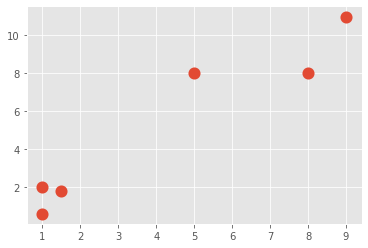

In [29]:
style.use('ggplot')
xs = np.array([[1, 2],[1.5, 1.8],[5, 8],[8, 8],[1, 0.6],[9, 11]])
plt.scatter(xs[:,0],xs[:,1],s=50,linewidths=5)
plt.show()

In [30]:
classifier = MeanShift()
classifier.fit(xs)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [31]:
means = classifier.cluster_centers_
labels = classifier.labels_

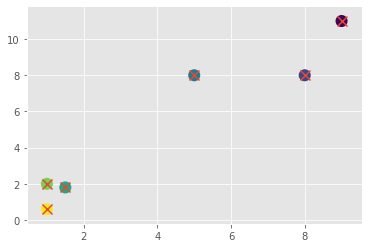

In [32]:
plt.scatter(xs[:,0],xs[:,1],s=50,c=labels,linewidths=5)
plt.scatter(means[:,0],means[:,1],s=100,linewidths=10,marker='x',zorder=10)
plt.show()

In [66]:
df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

In [67]:
df.drop(['name','body','ticket'],1,inplace=True)

In [68]:
df.fillna(0,inplace=True)

In [69]:
df=pd.get_dummies(df)
xs = np.array(df.drop(['survived'],1).astype('float'))
xs = preprocessing.scale(xs)

In [70]:
classifier.fit(xs,1)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

In [71]:
means=classifier.cluster_centers_
labels = classifier.labels_

In [72]:
original_df['cluster_group'] = np.nan
for i in range(len(xs)):
    original_df['cluster_group'].iloc[i] = labels[i]

c:\users\padideh\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
survival_rates = {}
clusters_num = len(np.unique(labels))
print(clusters_num)
for i in range(clusters_num):
    temp_df = original_df[(original_df['cluster_group']==float(i))]
    survival_cluster = temp_df[(temp_df['survived']==1)]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate
print(survival_rates)

6
{0: 0.379601226993865, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


In [74]:
survived = np.array(df['survived'])
print(labels)
print(survived)
accuracy = sum(np.logical_not(np.logical_xor(survived , labels)))/len(survived)
print(accuracy)
print(original_df[original_df['cluster_group']==400].describe())

[5 0 0 ... 0 0 0]
[1 1 0 ... 0 0 0]
0.6218487394957983
       pclass  survived  age  sibsp  parch  fare  body  cluster_group
count     0.0       0.0  0.0    0.0    0.0   0.0   0.0            0.0
mean      NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
std       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
min       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
25%       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
50%       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
75%       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
max       NaN       NaN  NaN    NaN    NaN   NaN   NaN            NaN
